In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [49]:
X=[]
y=[]
data=pd.read_csv("/workspaces/87071081/machine_learning/linear_regression/dataset/lin_reg_dataset1.csv",header=None)
data.head(10)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [50]:
data.size

194

In [51]:
#Making arrays
X=np.array(data.iloc[:,0]) #Reading first column
y=np.array(data.iloc[:,1]) #Reading second column

m=len(y)
print(m)

97


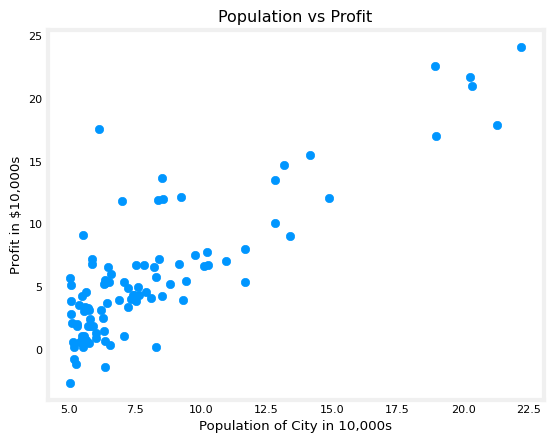

In [52]:
#Scatter graph for the data

plt.scatter(X,y)
plt.title("Population vs Profit")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()


In [53]:
x_train=X
y_train=y

In [54]:
# m is the number of training examples
print("No. of training examples: ",x_train.shape)
m=x_train.shape[0]


No. of training examples:  (97,)


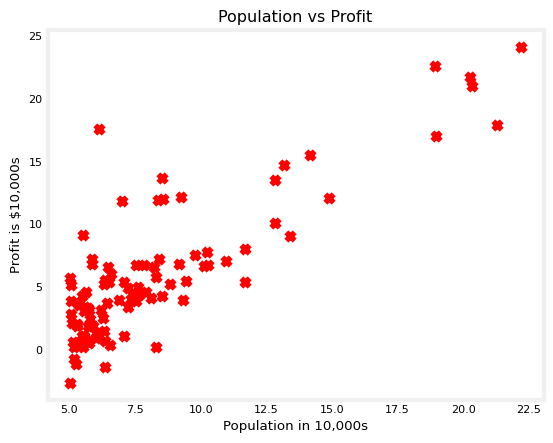

In [55]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Population vs Profit")
# Set the y-axis label
plt.ylabel('Profit is $10,000s')
# Set the x-axis label
plt.xlabel('Population in 10,000s')
plt.show()



In [56]:
#Initial value for parameters
w=0.75
b=0.2


In [57]:
def compute_model_output(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m) #Creating array for target values of f_wb
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

[ 4.782575  4.345775  6.58895   5.4524    4.59485   6.487175  5.8073
  6.633575  5.06465   3.99095   4.483025 10.823     4.5005    6.5063
  4.430525  4.23455   4.97405   4.047575  5.0222    5.5031    4.841825
 15.4025    4.317575  4.944575  4.373675 14.40875   9.821     8.41775
 10.082    16.85225   4.1393    5.14205   7.13615   4.61885   6.358325
  6.15005   6.271925  4.404725  9.827     4.96505   4.255175  5.361875
  8.981     4.530275  6.068525  5.519825  4.00265   4.55105   8.975
  4.3562    5.85515   4.180775  5.767925  5.902325  4.9496    4.969175
  4.90565   4.429775  7.18265   7.2902    6.81905   4.084475 16.15925
 11.381    14.41925   5.61365   6.421325  7.877     4.32455  15.45575
  7.802     5.700875  4.70465   5.619425  3.970175  5.110925  5.85395
  3.977375  7.9055    4.030775  4.4969    4.0913    4.966775  7.526525
  5.086925  6.5879    7.08515   4.7015    4.3403    3.99455   4.480775
  5.92745   4.603025  4.17905   6.42005  10.2455    4.277675]


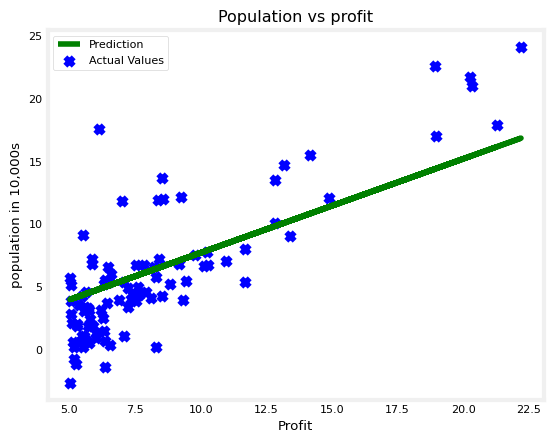

In [58]:
tmp_f_wb=compute_model_output(x_train,w,b)
print(tmp_f_wb)

plt.plot(x_train,tmp_f_wb,c='g',label='Prediction')
plt.scatter(x_train,y_train,marker='x',c='b',label='Actual Values')

plt.title("Population vs profit")
# Set the y-axis label
plt.ylabel('population in 10,000s')
# Set the x-axis label
plt.xlabel('Profit')
plt.legend()
plt.show()

In [59]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost_sum=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost
    total_cost=cost_sum/(2*m)

    return total_cost

 Applying Gradient Descent

In [60]:
def compute_gradient(x,y,w,b):

    m=x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=f_wb-y[i]
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i

    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_dw,dj_db

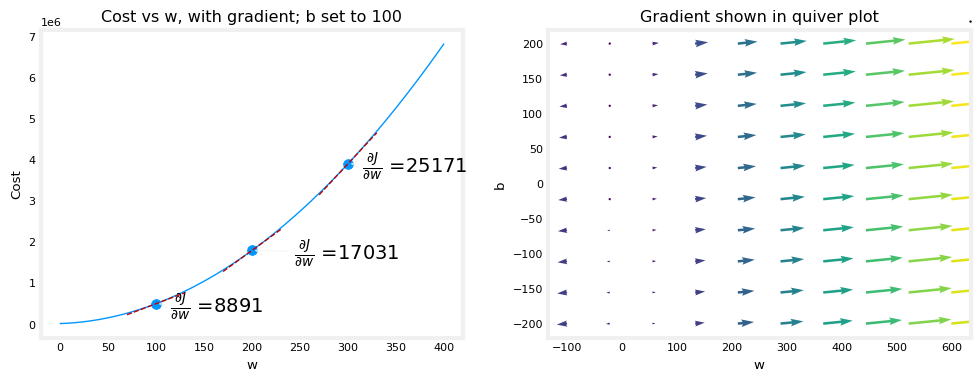

In [62]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [63]:
#Gradient Descent

def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    w=copy.deepcopy(w_in)
    J_history=[0]
    p_history=[0]
    b=b_in
    w=w_in

    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b)

        b=b-(alpha*dj_db)
        w=w-(alpha*dj_dw)

        if i <1000000:
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])

        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w,b,J_history,p_history





In [107]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000000
tmp_alpha = 0.0000001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.21e+01  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  6.533e-06, b: 5.83914e-07
Iteration 100000: Cost 1.10e+01  dj_dw: -2.875e+01, dj_db: -2.166e+00   w:  4.456e-01, b: 3.75338e-02
Iteration 200000: Cost 6.88e+00  dj_dw: -1.267e+01, dj_db: -5.520e-01   w:  6.418e-01, b: 5.00271e-02
Iteration 300000: Cost 6.09e+00  dj_dw: -5.609e+00, dj_db:  1.564e-01   w:  7.285e-01, b: 5.15239e-02
Iteration 400000: Cost 5.93e+00  dj_dw: -2.505e+00, dj_db:  4.670e-01   w:  7.669e-01, b: 4.81955e-02
Iteration 500000: Cost 5.90e+00  dj_dw: -1.141e+00, dj_db:  6.028e-01   w:  7.842e-01, b: 4.27539e-02
Iteration 600000: Cost 5.89e+00  dj_dw: -5.412e-01, dj_db:  6.617e-01   w:  7.922e-01, b: 3.63908e-02
Iteration 700000: Cost 5.88e+00  dj_dw: -2.776e-01, dj_db:  6.869e-01   w:  7.961e-01, b: 2.96299e-02
Iteration 800000: Cost 5.87e+00  dj_dw: -1.617e-01, dj_db:  6.972e-01   w:  7.983e-01, b: 2.27013e-02
Iteration 900000: Cost 5.87e+00  dj_dw: -1.107e-01, dj_db:  7.011e-01   w:  7.996e-0

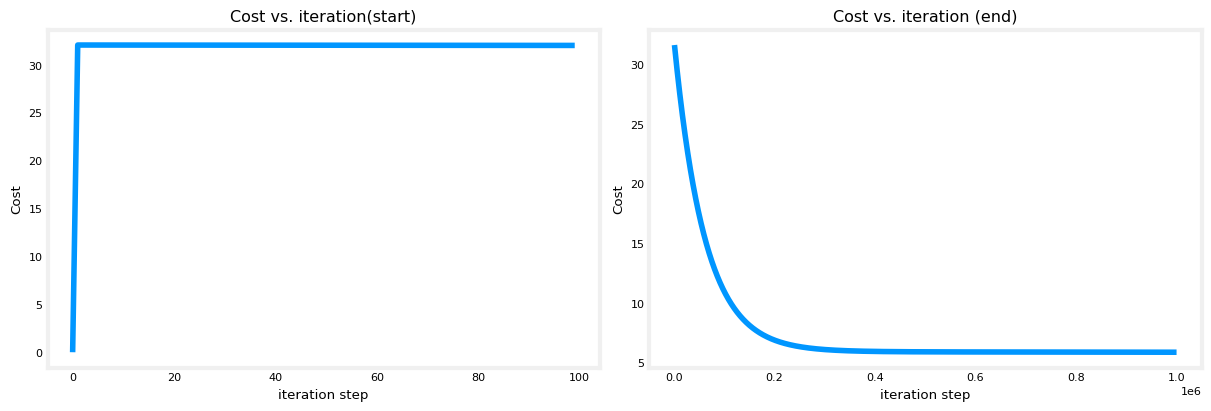

In [108]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [109]:
#% Predict values for population sizes of 35,000 and 70,000

predict1 = np.dot([1, 3.5],[b_final,w_final]) # takes inner product to get y
predict2 = np.dot([1, 7],[b_final,w_final]) # takes inner product to get y

print('For population = 35,000, we predict a profit of ', predict1*10000)
print('For population = 70,000, we predict a profit of ', predict2*10000)

For population = 35,000, we predict a profit of  28106.90971652105
For population = 70,000, we predict a profit of  56126.929472820884
